# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: LUIS ALFREDO OSORIO JARAMILLO  <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema:
> 1. Elección de grupos de población homogéneos <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

(*) La respuesta es obligatoria





                                        

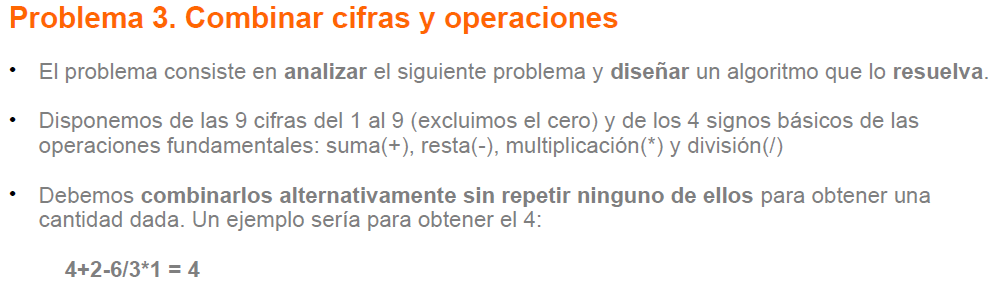

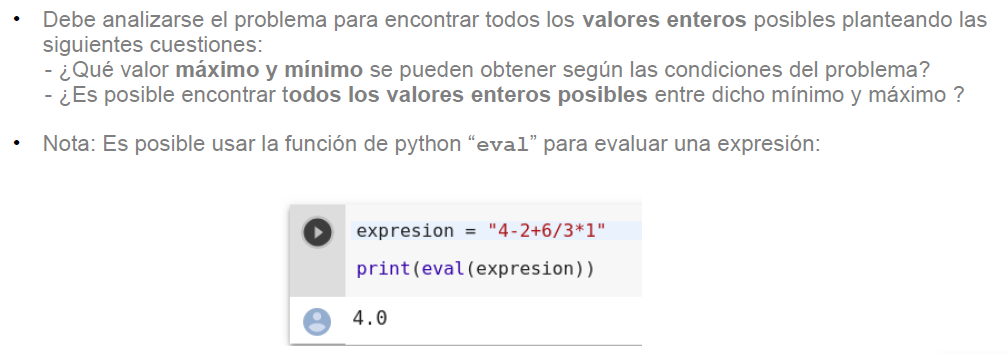

In [1]:
import itertools

T = []
for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
    T.append(a)
    #print(a)
    
print('\n',len(T))


 15120


(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Sin restricciones :

Posibles muestras ordenadas de r elementos distintos que se puedes extraer de un conjunto de n elementos ( r <= n )

$V_{n}^r = n * (n-1)*(n-2) ...(n-r+1)$

$V_{9}^5 = 9*8*7*6*5  = 15120 $

Con Restricciones

Numeros enteros unicamente :

Se obtienen 84 numeros Enteros. 

Numero enteros  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 73.0, 74.0, 75.0, 76.0, 77.0, -1.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0}


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)


Respuesta

T = set()  #devuelve el total de enteros

Para almacenar el numero de enteros sin repeticion se utilizo el set por su caractristica de no admitir elementos repetidos.

Para la salida del script se utilizo un Diccionario para almacenar clave y valor, donde la clave es la expresion obtenida de la 

operacion de permutar numeros y signos :

{'1-3+4/6*9': 4.0, '1-3+9/6*4': 4.0, '1-5+4/3*6': 4.0, '1-5+6/3*4': 4.0 ... }

Finalmente el script me devuelve una Tupla con los siguientes elementos :

( {expresion:valor} , valor_minimo , valor_Maximo , {numeros_enteros} )

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

La funcion objetivo es $ f( expresion) = x $

donde Expresion es una combinacion en particular que al ser evaluada se obtiene el valor  x

Es un problema de maximizacion ya que el objetivo es hallar todos los valores enteros posibles con las restricciones.


Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Es un algoritmo por fuerza bruta debido a que se evaluan todas las posibilidades.

In [2]:
import itertools
import math

def expres(x):
    r = {}
    m = 0   #para devolver el minimo
    M = 0   #para devolver el Maximo
    T = set()  #devuelve el total de enteros
    for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
        b=('-', '+', '/', '*')
        expresion=''
        i=0
        for n in a :      #(1, 2, 3, 4, 5) Crear expresion
            if i <=3 :    #indice para los signos b
                expresion += str(n) + b[i]
                i +=1
            else :
                expresion += str(n)
        parte_decimal, parte_entera = math.modf(eval(expresion))
        if parte_decimal == 0 :
            T.add(parte_entera)
            if parte_entera < m : m = eval(expresion)
            if parte_entera > M : M = eval(expresion)    
            if parte_entera == x :
                r[expresion] = parte_entera
    return r,m,M,T

resultado = expres(4)
print( resultado,'\n')
print('Valor minimo ', resultado[1],'\n')
print('Valor Maximo ', resultado[2],'\n')
print('Numero enteros ', resultado[3],'\n')
print('Total enteros ', len(resultado[3]),'\n')
print('Para un total de ', len(resultado[0]), ' expresiones con el numero solicitado')

({'1-3+4/6*9': 4.0, '1-3+9/6*4': 4.0, '1-5+4/3*6': 4.0, '1-5+6/3*4': 4.0, '1-7+4/2*5': 4.0, '1-7+5/2*4': 4.0, '1-7+5/3*6': 4.0, '1-7+5/4*8': 4.0, '1-7+6/3*5': 4.0, '1-7+8/4*5': 4.0, '1-9+3/2*8': 4.0, '1-9+4/2*6': 4.0, '1-9+6/2*4': 4.0, '1-9+6/4*8': 4.0, '1-9+8/2*3': 4.0, '1-9+8/4*6': 4.0, '2-1+4/8*6': 4.0, '2-1+6/8*4': 4.0, '2-8+5/3*6': 4.0, '2-8+6/3*5': 4.0, '3-2+4/8*6': 4.0, '3-2+6/8*4': 4.0, '3-5+4/6*9': 4.0, '3-5+9/6*4': 4.0, '3-7+2/1*4': 4.0, '3-7+4/1*2': 4.0, '3-9+2/1*5': 4.0, '3-9+4/2*5': 4.0, '3-9+5/1*2': 4.0, '3-9+5/2*4': 4.0, '3-9+5/4*8': 4.0, '3-9+8/4*5': 4.0, '4-1+2/6*3': 4.0, '4-1+3/6*2': 4.0, '4-2+1/3*6': 4.0, '4-2+3/9*6': 4.0, '4-2+6/3*1': 4.0, '4-2+6/9*3': 4.0, '4-3+1/2*6': 4.0, '4-3+2/6*9': 4.0, '4-3+6/2*1': 4.0, '4-3+9/6*2': 4.0, '4-6+2/1*3': 4.0, '4-6+2/3*9': 4.0, '4-6+3/1*2': 4.0, '4-6+9/3*2': 4.0, '4-9+3/2*6': 4.0, '4-9+6/2*3': 4.0, '5-3+1/2*4': 4.0, '5-3+1/4*8': 4.0, '5-3+4/2*1': 4.0, '5-3+8/4*1': 4.0, '5-4+1/2*6': 4.0, '5-4+1/3*9': 4.0, '5-4+2/6*9': 4.0, '5-4+6/2

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

Complejidad 

$V_{n}^r = n * (n-1)*(n-2) ...(n-r+1)$

Complejidad $ O(n^2) $

Dos bucles, uno para recorrer el vector de combinaciones y otro para recorrer cada set y combinar con los signos.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [3]:
# tomando como referencia https://docs.python.org/3.1/library/itertools.html?highlight=combinations

def product(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)


def permutations(iterable, r=None):
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    for indices in product(range(n), repeat=r):
        if len(set(indices)) == r:
            yield tuple(pool[i] for i in indices)
            
for a in permutations('123456789', 5):
    print(a)

('1', '2', '3', '4', '5')
('1', '2', '3', '4', '6')
('1', '2', '3', '4', '7')
('1', '2', '3', '4', '8')
('1', '2', '3', '4', '9')
('1', '2', '3', '5', '4')
('1', '2', '3', '5', '6')
('1', '2', '3', '5', '7')
('1', '2', '3', '5', '8')
('1', '2', '3', '5', '9')
('1', '2', '3', '6', '4')
('1', '2', '3', '6', '5')
('1', '2', '3', '6', '7')
('1', '2', '3', '6', '8')
('1', '2', '3', '6', '9')
('1', '2', '3', '7', '4')
('1', '2', '3', '7', '5')
('1', '2', '3', '7', '6')
('1', '2', '3', '7', '8')
('1', '2', '3', '7', '9')
('1', '2', '3', '8', '4')
('1', '2', '3', '8', '5')
('1', '2', '3', '8', '6')
('1', '2', '3', '8', '7')
('1', '2', '3', '8', '9')
('1', '2', '3', '9', '4')
('1', '2', '3', '9', '5')
('1', '2', '3', '9', '6')
('1', '2', '3', '9', '7')
('1', '2', '3', '9', '8')
('1', '2', '4', '3', '5')
('1', '2', '4', '3', '6')
('1', '2', '4', '3', '7')
('1', '2', '4', '3', '8')
('1', '2', '4', '3', '9')
('1', '2', '4', '5', '3')
('1', '2', '4', '5', '6')
('1', '2', '4', '5', '7')
('1', '2', '

('2', '5', '6', '1', '7')
('2', '5', '6', '1', '8')
('2', '5', '6', '1', '9')
('2', '5', '6', '3', '1')
('2', '5', '6', '3', '4')
('2', '5', '6', '3', '7')
('2', '5', '6', '3', '8')
('2', '5', '6', '3', '9')
('2', '5', '6', '4', '1')
('2', '5', '6', '4', '3')
('2', '5', '6', '4', '7')
('2', '5', '6', '4', '8')
('2', '5', '6', '4', '9')
('2', '5', '6', '7', '1')
('2', '5', '6', '7', '3')
('2', '5', '6', '7', '4')
('2', '5', '6', '7', '8')
('2', '5', '6', '7', '9')
('2', '5', '6', '8', '1')
('2', '5', '6', '8', '3')
('2', '5', '6', '8', '4')
('2', '5', '6', '8', '7')
('2', '5', '6', '8', '9')
('2', '5', '6', '9', '1')
('2', '5', '6', '9', '3')
('2', '5', '6', '9', '4')
('2', '5', '6', '9', '7')
('2', '5', '6', '9', '8')
('2', '5', '7', '1', '3')
('2', '5', '7', '1', '4')
('2', '5', '7', '1', '6')
('2', '5', '7', '1', '8')
('2', '5', '7', '1', '9')
('2', '5', '7', '3', '1')
('2', '5', '7', '3', '4')
('2', '5', '7', '3', '6')
('2', '5', '7', '3', '8')
('2', '5', '7', '3', '9')
('2', '5', '

('3', '8', '9', '6', '5')
('3', '8', '9', '6', '7')
('3', '8', '9', '7', '1')
('3', '8', '9', '7', '2')
('3', '8', '9', '7', '4')
('3', '8', '9', '7', '5')
('3', '8', '9', '7', '6')
('3', '9', '1', '2', '4')
('3', '9', '1', '2', '5')
('3', '9', '1', '2', '6')
('3', '9', '1', '2', '7')
('3', '9', '1', '2', '8')
('3', '9', '1', '4', '2')
('3', '9', '1', '4', '5')
('3', '9', '1', '4', '6')
('3', '9', '1', '4', '7')
('3', '9', '1', '4', '8')
('3', '9', '1', '5', '2')
('3', '9', '1', '5', '4')
('3', '9', '1', '5', '6')
('3', '9', '1', '5', '7')
('3', '9', '1', '5', '8')
('3', '9', '1', '6', '2')
('3', '9', '1', '6', '4')
('3', '9', '1', '6', '5')
('3', '9', '1', '6', '7')
('3', '9', '1', '6', '8')
('3', '9', '1', '7', '2')
('3', '9', '1', '7', '4')
('3', '9', '1', '7', '5')
('3', '9', '1', '7', '6')
('3', '9', '1', '7', '8')
('3', '9', '1', '8', '2')
('3', '9', '1', '8', '4')
('3', '9', '1', '8', '5')
('3', '9', '1', '8', '6')
('3', '9', '1', '8', '7')
('3', '9', '2', '1', '4')
('3', '9', '

('5', '4', '2', '9', '8')
('5', '4', '3', '1', '2')
('5', '4', '3', '1', '6')
('5', '4', '3', '1', '7')
('5', '4', '3', '1', '8')
('5', '4', '3', '1', '9')
('5', '4', '3', '2', '1')
('5', '4', '3', '2', '6')
('5', '4', '3', '2', '7')
('5', '4', '3', '2', '8')
('5', '4', '3', '2', '9')
('5', '4', '3', '6', '1')
('5', '4', '3', '6', '2')
('5', '4', '3', '6', '7')
('5', '4', '3', '6', '8')
('5', '4', '3', '6', '9')
('5', '4', '3', '7', '1')
('5', '4', '3', '7', '2')
('5', '4', '3', '7', '6')
('5', '4', '3', '7', '8')
('5', '4', '3', '7', '9')
('5', '4', '3', '8', '1')
('5', '4', '3', '8', '2')
('5', '4', '3', '8', '6')
('5', '4', '3', '8', '7')
('5', '4', '3', '8', '9')
('5', '4', '3', '9', '1')
('5', '4', '3', '9', '2')
('5', '4', '3', '9', '6')
('5', '4', '3', '9', '7')
('5', '4', '3', '9', '8')
('5', '4', '6', '1', '2')
('5', '4', '6', '1', '3')
('5', '4', '6', '1', '7')
('5', '4', '6', '1', '8')
('5', '4', '6', '1', '9')
('5', '4', '6', '2', '1')
('5', '4', '6', '2', '3')
('5', '4', '

('7', '2', '3', '5', '8')
('7', '2', '3', '5', '9')
('7', '2', '3', '6', '1')
('7', '2', '3', '6', '4')
('7', '2', '3', '6', '5')
('7', '2', '3', '6', '8')
('7', '2', '3', '6', '9')
('7', '2', '3', '8', '1')
('7', '2', '3', '8', '4')
('7', '2', '3', '8', '5')
('7', '2', '3', '8', '6')
('7', '2', '3', '8', '9')
('7', '2', '3', '9', '1')
('7', '2', '3', '9', '4')
('7', '2', '3', '9', '5')
('7', '2', '3', '9', '6')
('7', '2', '3', '9', '8')
('7', '2', '4', '1', '3')
('7', '2', '4', '1', '5')
('7', '2', '4', '1', '6')
('7', '2', '4', '1', '8')
('7', '2', '4', '1', '9')
('7', '2', '4', '3', '1')
('7', '2', '4', '3', '5')
('7', '2', '4', '3', '6')
('7', '2', '4', '3', '8')
('7', '2', '4', '3', '9')
('7', '2', '4', '5', '1')
('7', '2', '4', '5', '3')
('7', '2', '4', '5', '6')
('7', '2', '4', '5', '8')
('7', '2', '4', '5', '9')
('7', '2', '4', '6', '1')
('7', '2', '4', '6', '3')
('7', '2', '4', '6', '5')
('7', '2', '4', '6', '8')
('7', '2', '4', '6', '9')
('7', '2', '4', '8', '1')
('7', '2', '

('8', '2', '4', '1', '9')
('8', '2', '4', '3', '1')
('8', '2', '4', '3', '5')
('8', '2', '4', '3', '6')
('8', '2', '4', '3', '7')
('8', '2', '4', '3', '9')
('8', '2', '4', '5', '1')
('8', '2', '4', '5', '3')
('8', '2', '4', '5', '6')
('8', '2', '4', '5', '7')
('8', '2', '4', '5', '9')
('8', '2', '4', '6', '1')
('8', '2', '4', '6', '3')
('8', '2', '4', '6', '5')
('8', '2', '4', '6', '7')
('8', '2', '4', '6', '9')
('8', '2', '4', '7', '1')
('8', '2', '4', '7', '3')
('8', '2', '4', '7', '5')
('8', '2', '4', '7', '6')
('8', '2', '4', '7', '9')
('8', '2', '4', '9', '1')
('8', '2', '4', '9', '3')
('8', '2', '4', '9', '5')
('8', '2', '4', '9', '6')
('8', '2', '4', '9', '7')
('8', '2', '5', '1', '3')
('8', '2', '5', '1', '4')
('8', '2', '5', '1', '6')
('8', '2', '5', '1', '7')
('8', '2', '5', '1', '9')
('8', '2', '5', '3', '1')
('8', '2', '5', '3', '4')
('8', '2', '5', '3', '6')
('8', '2', '5', '3', '7')
('8', '2', '5', '3', '9')
('8', '2', '5', '4', '1')
('8', '2', '5', '4', '3')
('8', '2', '

('9', '5', '2', '8', '4')
('9', '5', '2', '8', '6')
('9', '5', '2', '8', '7')
('9', '5', '3', '1', '2')
('9', '5', '3', '1', '4')
('9', '5', '3', '1', '6')
('9', '5', '3', '1', '7')
('9', '5', '3', '1', '8')
('9', '5', '3', '2', '1')
('9', '5', '3', '2', '4')
('9', '5', '3', '2', '6')
('9', '5', '3', '2', '7')
('9', '5', '3', '2', '8')
('9', '5', '3', '4', '1')
('9', '5', '3', '4', '2')
('9', '5', '3', '4', '6')
('9', '5', '3', '4', '7')
('9', '5', '3', '4', '8')
('9', '5', '3', '6', '1')
('9', '5', '3', '6', '2')
('9', '5', '3', '6', '4')
('9', '5', '3', '6', '7')
('9', '5', '3', '6', '8')
('9', '5', '3', '7', '1')
('9', '5', '3', '7', '2')
('9', '5', '3', '7', '4')
('9', '5', '3', '7', '6')
('9', '5', '3', '7', '8')
('9', '5', '3', '8', '1')
('9', '5', '3', '8', '2')
('9', '5', '3', '8', '4')
('9', '5', '3', '8', '6')
('9', '5', '3', '8', '7')
('9', '5', '4', '1', '2')
('9', '5', '4', '1', '3')
('9', '5', '4', '1', '6')
('9', '5', '4', '1', '7')
('9', '5', '4', '1', '8')
('9', '5', '

(*)Calcula la complejidad del algoritmo 

Respuesta

La complejidad no se reduce por que se requieren los dos bucles para realizar las permutaciones entre numeros y signos.


Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Modificacion del script para que dado un numero aleatorio entre 0 y 77 me devuelva la expresion con numeros del 0 al 9 y los signos basicos.


In [ ]:
import itertools
import math
import numpy as np

def expres(x):
    r = {}
    for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
        b=('-', '+', '/', '*')
        expresion=''
        i=0
        for n in a :      #(1, 2, 3, 4, 5) Crear expresion
            if i <=3 :    #indice para los signos b
                expresion += str(n) + b[i]
                i +=1
            else :
                expresion += str(n)
        parte_decimal, parte_entera = math.modf(eval(expresion))
        if parte_decimal == 0 :
            if parte_entera == x :
                r[expresion] = parte_entera
    return r



Aplica el algoritmo al juego de datos generado

Respuesta

In [8]:
resultado = expres(np.random.randint(0,70))

print( resultado,'\n')

{'2-5+8/1*9': 69.0, '2-5+9/1*8': 69.0, '3-6+8/1*9': 69.0, '3-6+9/1*8': 69.0, '4-7+8/1*9': 69.0, '4-7+9/1*8': 69.0, '8-2+7/1*9': 69.0, '8-2+9/1*7': 69.0} 



Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

 - utilizacion de python itertools
 
https://docs.python.org/3.1/library/itertools.html?highlight=combinations

 - generacion de permutaciones
 
https://stackoverflow.com/questions/104420/how-to-generate-all-permutations-of-a-list

 - manejo de objetos de python como set, lista y Diccionarios

https://www.w3schools.com/python/python_lists.asp



Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

El problema puede aumentar en el conjunto de numeros a partir del cual se extrae la combinacion. Se podria permitir que se 

repitieran signos para generar cadenas de evaluacion mas largas. La formula que nos da el numero de combinaciones de un sub-

conjunto de numeros sigue siendo :

$V_{n}^r = n * (n-1)*(n-2) ...(n-r+1)$

Pero el algoritmo no neceariamente modifica su complejidad, ya que logrando todas las combinaciones del subconjunto de numeros

se obtendrian las posibles expresiones a evaluar.